In [1]:
import sys
# SITE_PACKAGES_PATH = '/home/rpartsey/miniconda3/envs/benchbot/lib/python3.8/site-packages'
# if SITE_PACKAGES_PATH not in sys.path:
#     sys.path.insert(0, SITE_PACKAGES_PATH)
sys.path.insert(0, '../..')  # add project roo dir to the path

In [2]:
import os
import copy
import pickle
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from scipy.spatial.transform import Rotation as Rot

from utils.vis.utils import (
    ObservationVisualiser, 
    _vis_depth, 
    _vis_laser, 
    _vis_rgb,  
    _vis_poses, 
    _set_axes_equal
)

%matplotlib inline

In [3]:
scenes = [
    'miniroom_1_observations.p',
    'house_1_observations.p'
]
scene_id = 0

observations_path = f'../../data/{scenes[scene_id]}'

In [4]:
with open(observations_path, 'rb') as f:
    observations_data = pickle.load(f)
    
observations = observations_data['observations']

### ObservationVisualiser Example

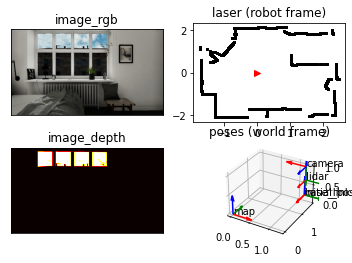

In [5]:
obs_visualiser = ObservationVisualiser()
obs_visualiser.visualise(observations[0])

### Poses and Egocentric Laser

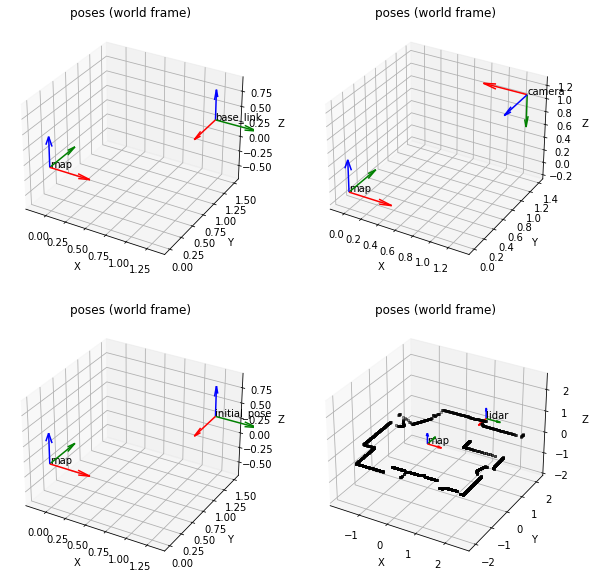

In [6]:
obs = observations[0]

poses = copy.deepcopy(obs['poses'])
laser = copy.deepcopy(obs['laser'])

fig = plt.figure(figsize=(10, 10))
for i, (k,v) in enumerate(poses.items()):
    
    ax = fig.add_subplot(2,2, 1+i, projection='3d')
    _vis_poses(ax, {k: v})
    
    if k == 'lidar':
        ax.scatter3D(
            [x[0] * np.cos(x[1]) for x in laser['scans']],
            [x[0] * np.sin(x[1]) for x in laser['scans']], 
            [0]*len(laser['scans']),
                   c='k',
                   s=4,
                   marker='s'
        )
    
    _set_axes_equal(ax)
    
    ax.set_xlabel('X') # 'r'
    ax.set_ylabel('Y') # 'g'
    ax.set_zlabel('Z') # 'b'

plt.show()

### 3D 

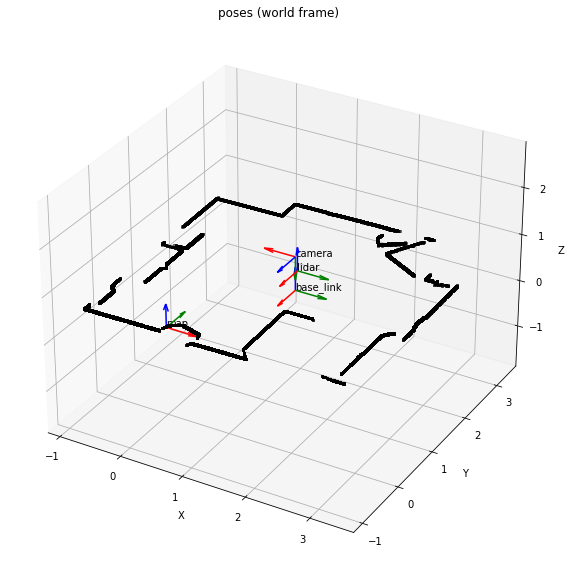

In [7]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

poses = copy.deepcopy(observations[0]['poses'])
for k in ['initial_pose']:
    poses.pop(k)
_vis_poses(ax, poses)

for ob in observations[:20]:
    
    poses = copy.deepcopy(ob['poses'])

    
    lidar = poses['lidar']
    origin = lidar['translation_xyz']
    
    orientation = lidar['rotation_rpy']
    rot_obj = Rot.from_euler('xyz', orientation)
    
    laser = ob['laser']
    
    
    points = list(zip(
        [x[0] * np.cos(x[1]) for x in laser['scans']],
        [x[0] * np.sin(x[1]) for x in laser['scans']], 
        [0] * len(laser['scans'])
    ))
    
    points_rot = [rot_obj.apply(p) for p in points]
    points_rot_trans = [(np.array(p)+origin).tolist() for p in points_rot]
    
    ax.scatter(
        [x[0] for x in points_rot_trans],
        [x[1] for x in points_rot_trans], 
        [x[2] for x in points_rot_trans],
               c='k',
               s=4,
               marker='s'
    )


_set_axes_equal(ax)

ax.set_xlabel('X') # 'r'
ax.set_ylabel('Y') # 'g'
ax.set_zlabel('Z') # 'b'

plt.show()

### 2D Cartesian

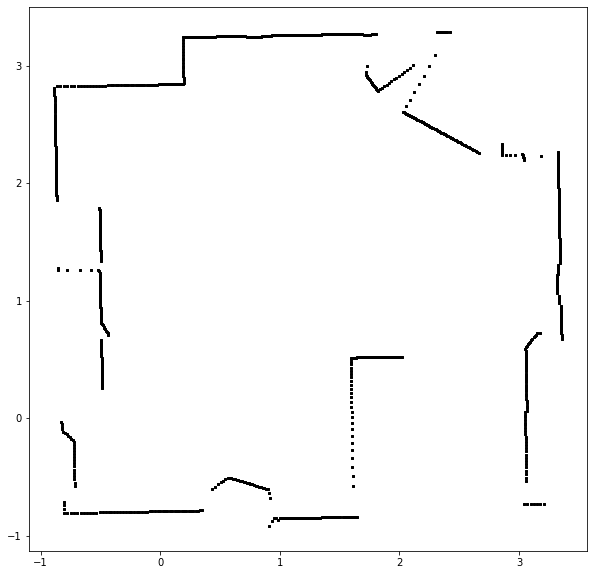

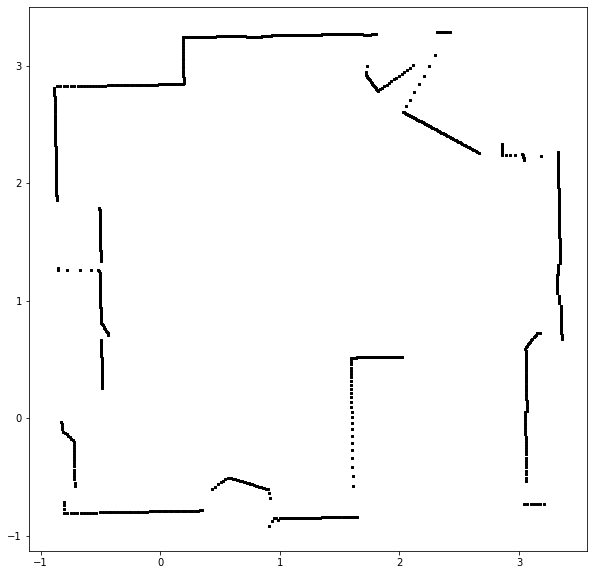

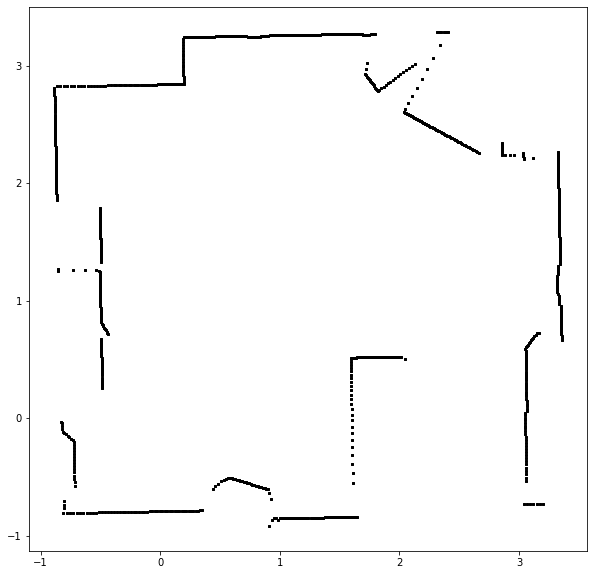

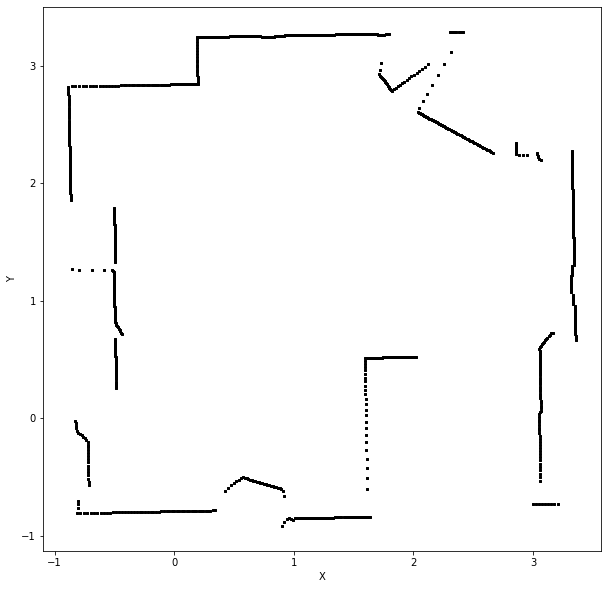

In [8]:
# fig = plt.figure(figsize=(10, 10))
# # ax = fig.add_subplot(111, projection='3d')
# ax = fig.add_subplot(111)

# poses = copy.deepcopy(observations[0]['poses'])
# for k in ['base_link', 'initial_pose']:
#     poses.pop(k)
# _vis_poses(ax, poses)

for ob in observations[:4]:
    fig = plt.figure(figsize=(10, 10))
    # ax = fig.add_subplot(111, projection='3d')
    ax = fig.add_subplot(111)
    
    poses = copy.deepcopy(ob['poses'])

    
    lidar = poses['lidar']
    origin = lidar['translation_xyz']
    
    orientation = lidar['rotation_rpy']
    rot_obj = Rot.from_euler('xyz', orientation)
    
    laser = ob['laser']
    
    
    points = list(zip(
        [x[0] * np.cos(x[1]) for x in laser['scans']],
        [x[0] * np.sin(x[1]) for x in laser['scans']], 
        [0] * len(laser['scans'])
    ))
    
    points_rot = [rot_obj.apply(p) for p in points]
    points_rot_trans = [(np.array(p)+origin).tolist() for p in points_rot]
    
    ax.scatter(
        [x[0] for x in points_rot_trans],
        [x[1] for x in points_rot_trans], 
#         [x[2] for x in points_rot_trans],
               c='k',
               s=4,
               marker='s'
    )


# _set_axes_equal(ax)

ax.set_xlabel('X') # 'r'
ax.set_ylabel('Y') # 'g'
# ax.set_zlabel('Z') # 'b'

plt.show()

### 2D Polar (TODO: convert to global coordinate frame)

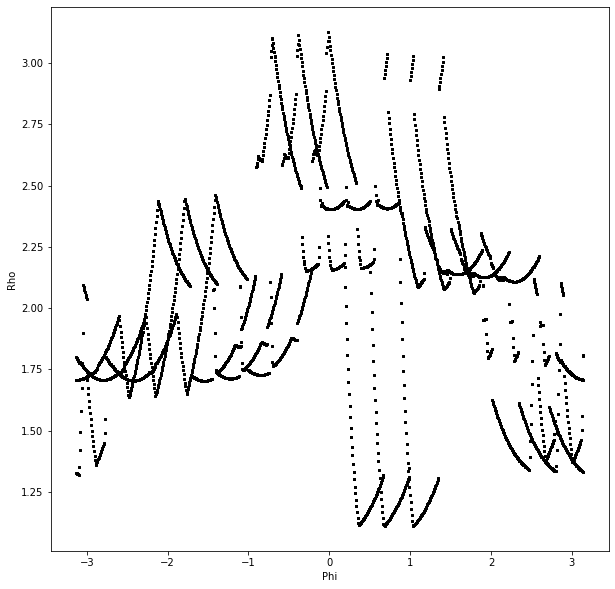

In [9]:
fig = plt.figure(figsize=(10, 10))
# ax = fig.add_subplot(111, projection='3d')
ax = fig.add_subplot(111)

# poses = copy.deepcopy(observations[0]['poses'])
# for k in ['base_link', 'initial_pose']:
#     poses.pop(k)
# _vis_poses(ax, poses)

for ob in observations[:4]:
    
    poses = copy.deepcopy(ob['poses'])

    
    lidar = poses['lidar']
    origin = lidar['translation_xyz']
    
    orientation = lidar['rotation_rpy']
    rot_obj = Rot.from_euler('xyz', orientation)
    
    laser = ob['laser']
    
#     points = list(zip(
#         [x[0] * np.cos(x[1]) for x in laser['scans']],
#         [x[0] * np.sin(x[1]) for x in laser['scans']], 
#         [0] * len(laser['scans'])
#     ))
    
    points_rot = [rot_obj.apply(p) for p in points]
    points_rot_trans = [(np.array(p)+origin).tolist() for p in points_rot]
    
    ax.scatter(
        [x[1] for x in laser['scans']],
        [x[0] for x in laser['scans']], 
#         [x[2] for x in points_rot_trans],
           c='k',
           s=4,
           marker='s'
    )
#     ax.scatter(
#         [x[0] for x in points_rot_trans],
#         [x[1] for x in points_rot_trans], 
# #         [x[2] for x in points_rot_trans],
#                c='k',
#                s=4,
#                marker='s'
#     )


# _set_axes_equal(ax)

ax.set_xlabel('Phi') # 'r'
ax.set_ylabel('Rho') # 'g'
# ax.set_zlabel('Z') # 'b'

plt.show()